## NOME: LUIS GUSTAVO PEÇANHA NUSP: 9806763

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr, pearsonr, spearmanr
import seaborn as sns

## EXERCICIO 1

Gere dados a partir de uma distribuição de Poisson. Varie a taxas λ no intervalo (1,10) e mostre o gráfico da média em função da variância.

In [2]:
taxa_lbda = 10 # Taxa da distribuição de Poisson

data = np.random.poisson(lam=taxa_lbda, size=2000)

Text(0.5, 0, &#39;λ&#39;)

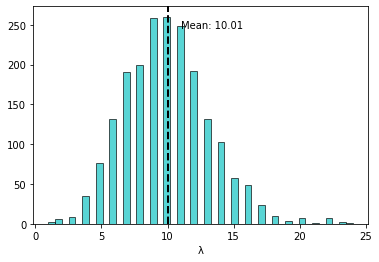

In [3]:
result = plt.hist(data, bins=round(pow(len(data), (1/2))), color='c', edgecolor='k', alpha=0.65)
plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(data.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))
plt.xlabel('λ')

## Exercicio 2

Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [4]:
data_iris = pd.read_csv('dados/iris.csv')

In [5]:
for col in list(data_iris.columns)[:4]: # Para não iterar na coluna categórica
    print('Atributo: {}'.format(col))
    print('Média: \t\t{}'.format(data_iris[col].mean()))
    print('Variância: \t{}'.format(data_iris[col].var()))
    print('IQR: \t\t{}\n'.format(iqr(data_iris[col])))

Atributo: sepal_length
Média: 		5.843333333333334
Variância: 	0.6856935123042507
IQR: 		1.3000000000000007

Atributo: sepal_width
Média: 		3.0540000000000003
Variância: 	0.1880040268456376
IQR: 		0.5

Atributo: petal_length
Média: 		3.758666666666666
Variância: 	3.113179418344519
IQR: 		3.4999999999999996

Atributo: petal_width
Média: 		1.1986666666666668
Variância: 	0.582414317673378
IQR: 		1.5



## Exercicio 3

Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

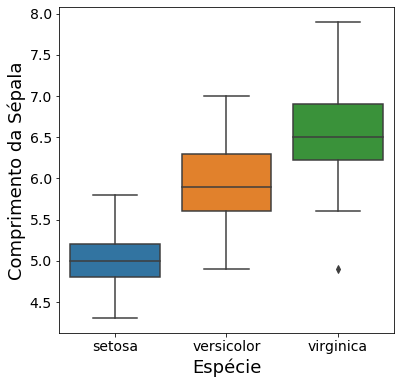

In [6]:
plt.figure(figsize=(6, 6))
# mostra o boxplot
sns.boxplot(x="species", y='sepal_length', data=data_iris)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da Sépala', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

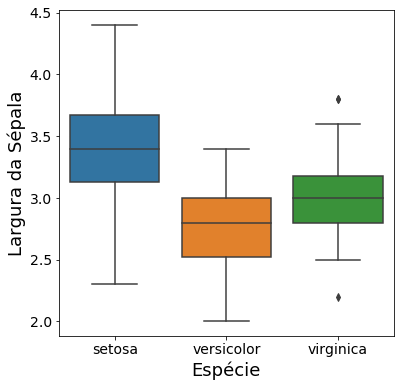

In [7]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="species", y='sepal_width', data=data_iris)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da Sépala', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

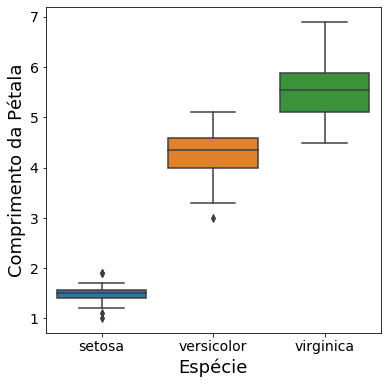

In [8]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="species", y='petal_length', data=data_iris)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da Pétala', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

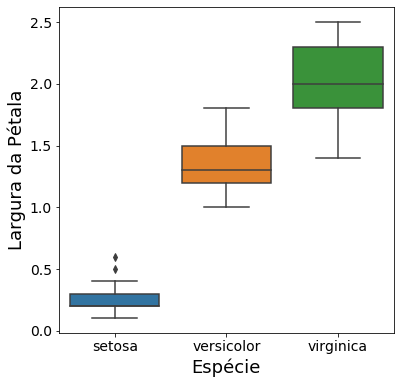

In [9]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="species", y='petal_width', data=data_iris)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da Pétala', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

## Exercicio 4

Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

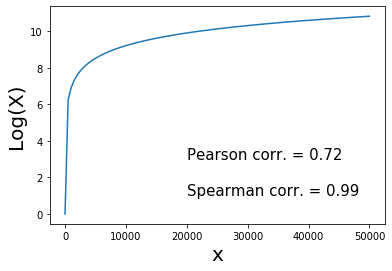

In [10]:
N = 100
x = np.linspace(1, 50000, N) 
z = np.log(x)

plt.plot(x, z) 
plt.xlabel("x",fontsize = 20) 
plt.ylabel("Log(X)", fontsize = 20) 
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,3, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()

A Correlação de Pearson funciona melhor com relações lineares e com taxa de crescimento constante. Já a Correlação de Spearman possui desempenho melhor sobre dados com relação monotônico que é quando uma variavél cresce ou descresce, a outra possui o mesmo comportamento. É devido a isso que a correlação de Spearman teve um desempenho melhor sobre a função log pois enquanto x cresce, log(x) também cresce mas não em taxa constante. Como ambos as variavéis estão crescendo positivamente, as correlações apresentam valor positivo. 

## Exercício 5

Considere o código que mostra como a correlação de Pearson muda com a inclusão de ruídos(ver Python: Análise Exploratória de Dados). Modifique a função para 𝑌=0.5∗𝑋+Y=0.5∗X+ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo)

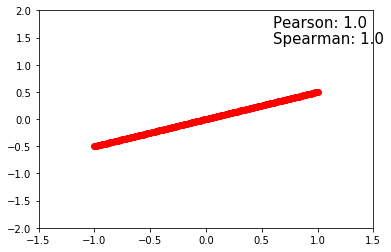

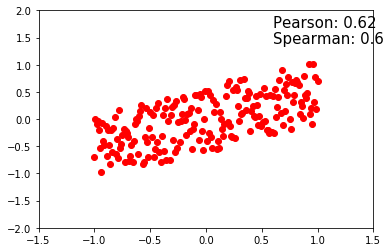

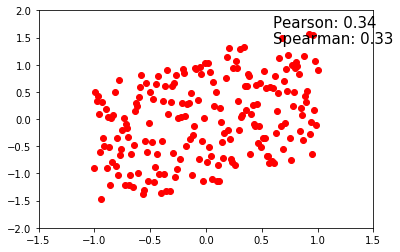

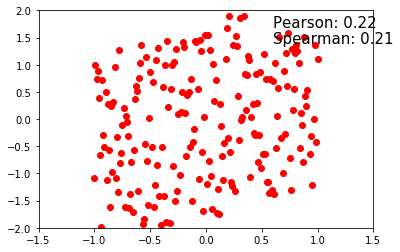

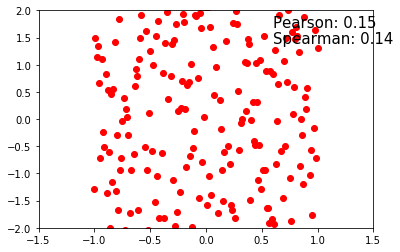

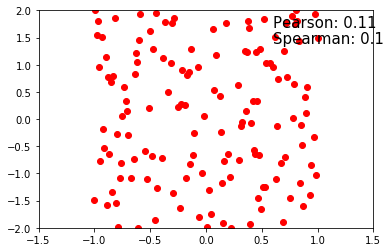

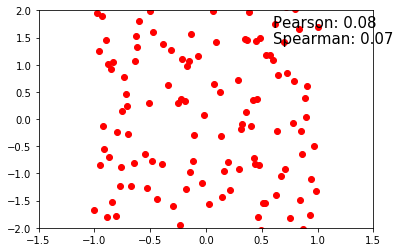

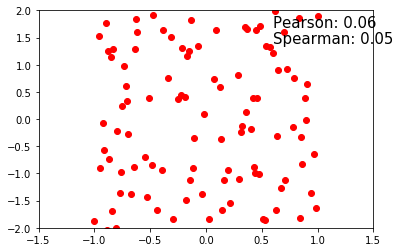

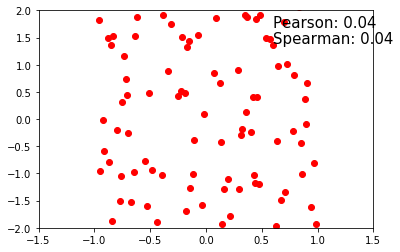

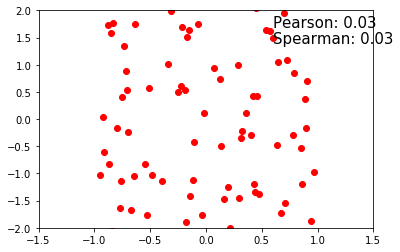

In [11]:
N = 200     # Aumentei a quantidade de elementos
X = np.linspace(-1,1, N)
erro = np.random.uniform(-3, 3, N) # ruído a ser incluído na relação linear. Ruido variado de -3 a 3
for sigma in np.arange(0,2,0.2):
    # Y = 0.5 * X + Y = 0.5 * X + erro # !!!! Não é possível executar esse comando dessa forma logo alterei para uma forma que imaginei correta na linha seguinte
    Y = 0.5 * X + erro * sigma
    plt.plot(X,Y, 'ro')
    pearson_corr, p_value = pearsonr(X, Y) # calcula a correlação
    spearman_corr, p_value_spear = spearmanr(X, Y)
    pearson_corr = int(pearson_corr*100)/100
    spearman_corr = int(spearman_corr*100)/100
    string_pearson = 'Pearson: '+ str(pearson_corr)
    string_spearman = 'Spearman: '+ str(spearman_corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string_pearson, fontsize=15)
    plt.text(0.6,1.4, string_spearman, fontsize=15)
    plt.show(True)

## Exercício 6

Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

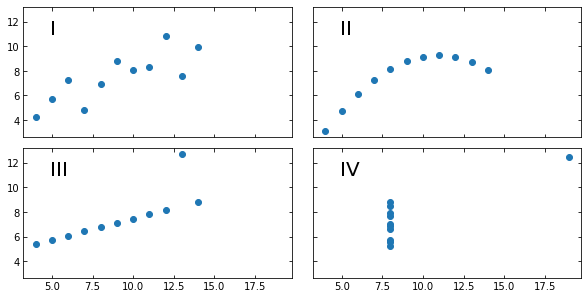

In [12]:
import matplotlib.pyplot as plt 
import numpy as np
x=[10,8,13,9,11,14,6,4,12,7,5]
y1=[8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]
y2=[9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]
y3=[7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]
x4=[8,8,8,8,8,8,8,19,8,8,8]
y4=[6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89]
datasets={ 
    'I'  :(x,y1),
    'II' :(x,y2),
    'III':(x,y3),
    'IV' :(x4,y4)
}
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,5), gridspec_kw={'wspace':0.08,'hspace':0.08})
for ax, (label, (x, y)) in zip (axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

In [13]:
print("Média x: {}".format(np.array(x).mean()))
print("Média y1: {}".format(np.array(y1).mean()))
print("Média y2: {}".format(np.array(y2).mean()))
print("Média y3: {}".format(np.array(y3).mean()))
print("Média x4: {}".format(np.array(x4).mean()))
print("Média y4: {}".format(np.array(y4).mean()))

Média x: 9.0
Média y1: 7.500909090909093
Média y2: 7.50090909090909
Média y3: 7.5
Média x4: 9.0
Média y4: 7.500909090909091


In [14]:
print("Variância x: {}".format(np.array(x).var()))
print("Variância y1: {}".format(np.array(y1).var()))
print("Variância y2: {}".format(np.array(y2).var()))
print("Variância y3: {}".format(np.array(y3).var()))
print("Variância x4: {}".format(np.array(x4).var()))
print("Variância y4: {}".format(np.array(y4).var()))

Variância x: 10.0
Variância y1: 3.7520628099173554
Variância y2: 3.752390082644628
Variância y3: 3.747836363636364
Variância x4: 10.0
Variância y4: 3.7484082644628103


In [15]:
print("Correlação de Pearson")
print("I: \t{}".format(pearsonr(x, y1)[0]))
print("II: \t{}".format(pearsonr(x, y2)[0]))
print("III: \t{}".format(pearsonr(x, y3)[0]))
print("IV: \t{}".format(pearsonr(x4, y4)[0]))

Correlação de Pearson
I: 	-0.5290927360060631
II: 	-0.7184365319176681
III: 	-0.34466100097423275
IV: 	0.8165214368885028


In [16]:
print("Correlação de Spearman")
print("I: \t{}".format(spearmanr(x, y1)[0]))
print("II: \t{}".format(spearmanr(x, y2)[0]))
print("III: \t{}".format(spearmanr(x, y3)[0]))
print("IV: \t{}".format(spearmanr(x4, y4)[0]))

Correlação de Spearman
I: 	-0.5
II: 	-0.5
III: 	-0.5
IV: 	0.5


Esses dados evidenciam a importância de desenhar-se gráficos dos conjuntos de dados antes de realizar conclusões. Analisando apenas as medidas estatísticas calculando, poderia concluir-se que os dados exibidos são muito similares. No entanto, ao observar-se os gráficos de cada conjunto, percebe-se que há diferenças significativas entre eles.